In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



In [97]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [98]:
df.shape

(5571, 5)

In [99]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available Free ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam                                                NaN        NaN   
3      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
4     spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
...    ...                                                ...        ...   
5566  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5567   ham            Will ï¿½_ b going to esplanade fr home?        NaN   
5568   ham  Pity, * was in mood for that. So...any other s...        NaN   
5569   ham  The guy did some bitching but I acted like i'd...        NaN   
5570   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [100]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available Free ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam                                                NaN        NaN   
3      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
4     spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
...    ...                                                ...        ...   
5566  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5567   ham            Will ï¿½_ b going to esplanade fr home?        NaN   
5568   ham  Pity, * was in mood for that. So...any other s...        NaN   
5569   ham  The guy did some bitching but I acted like i'd...        NaN   
5570   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [101]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available Free ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,NaN,NaN,NaN,NaN
3,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
4,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN


In [102]:
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [103]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [104]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available Free ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,NaN
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [105]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace= True)

In [106]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available Free ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,NaN
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [107]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [108]:
df['Target']=encoder.fit_transform(df['Target'])

In [109]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available Free ..."
1,0,Ok lar... Joking wif u oni...
2,1,NaN
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,1,FreeMsg Hey there darling it's been 3 week's n...


In [110]:
df.isnull().sum()

Target    0
Text      1
dtype: int64

In [111]:
df.duplicated().sum()

402

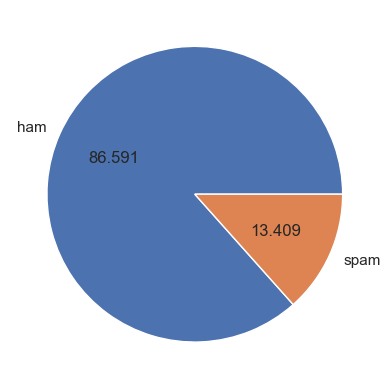

In [112]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.3f')
plt.show()

In [113]:
import nltk

In [114]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [115]:
df['num_character'] = df['Text'].apply(lambda x: len(str(x))) # Changed code. Convert x to a string using str(x) before calculating the length. 
df['num_words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(str(x)))) # Changed code. Convert x to a string using str(x) before tokenizing.
df['num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(str(x)))) # Changed code. Convert x to a string using str(x) before tokenizing.
df.head()

,Target,Text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available Free ...",327,82,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,NaN,3,1,1
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
4,1,FreeMsg Hey there darling it's been 3 week's n...,149,39,4


In [116]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5571.000000,5571.000000,5571.000000
mean,80.381799,18.704362,1.996589
std,59.886333,13.768776,1.520355
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,122.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [117]:
df[df['Target']==1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,139.136546,27.843373,3.020080
std,29.733852,6.929042,1.538905
min,3.000000,1.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,150.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,225.000000,46.000000,9.000000


In [118]:
df[df['Target']==0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4824.000000,4824.000000,4824.000000
mean,71.283582,17.289179,1.838101
std,58.203287,14.020568,1.454583
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_character', ylabel='Count'>

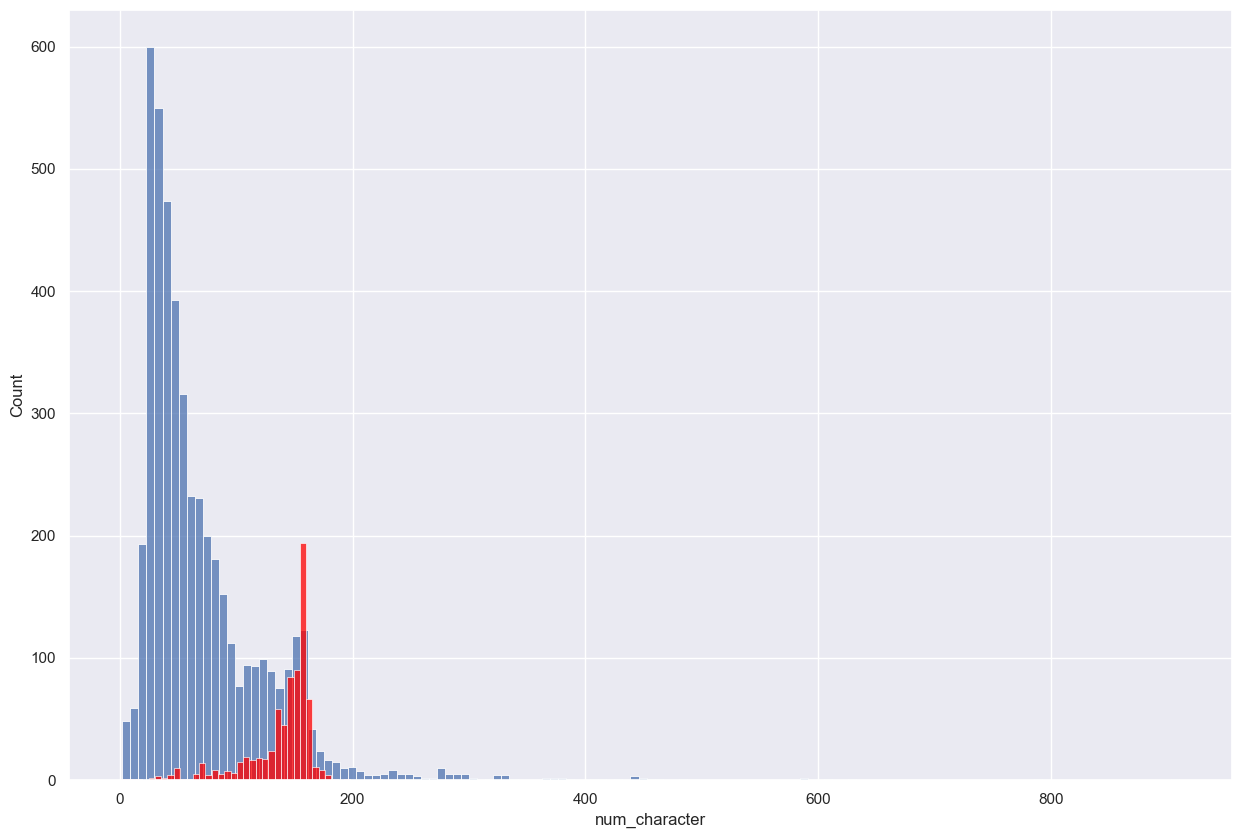

In [119]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['Target']==0]['num_character'])
sns.histplot(df[df['Target']==1]['num_character'],color='red')

In [120]:
import nltk
nltk.download('stopwords')

import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
def transform_text(text):
  y=[]
  text=text.lower().split()
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = " ".join(y)
  return text

In [122]:
def transform_text(text):
  y=[]
  # Check if the text is a string before applying lower() and split() methods.
  if isinstance(text, str):
    text=text.lower().split()
    y.clear()
    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)

    text = " ".join(y)
  # If not a string, return the original value
  else:
    text = text
  return text

In [123]:
# Apply the transform_text function to the 'Text' column and create a new 'transformed_text' column
df['transformed_text'] = df['Text'].apply(transform_text)

# Convert the 'transformed_text' column to string type
df['transformed_text'] = df['transformed_text'].astype(str)

In [124]:
spam_text=df[df['Target']==1]['transformed_text'].str.cat(sep='')

In [125]:
!pip install wordcloud


In [126]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(spam_text)



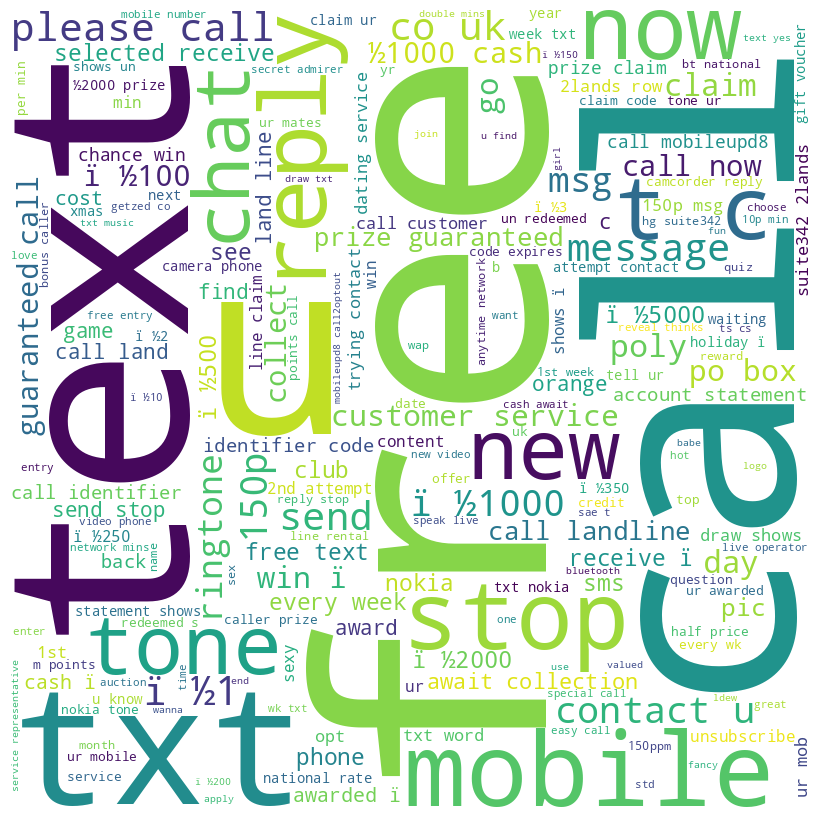

In [127]:
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [128]:
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)
len(ham_corpus)

41392

In [129]:
from collections import Counter

In [130]:
spam_counter=Counter(ham_corpus)
spam_counter.most_common(30)

[('u', 873),
 ("i'm", 369),
 ('get', 293),
 ('2', 285),
 ('&lt;#&gt;', 276),
 ('go', 235),
 ('ur', 235),
 ('got', 227),
 ('like', 221),
 ('call', 215),
 ('come', 215),
 ('know', 208),
 ('good', 187),
 ("i'll", 167),
 ('...', 162),
 ('going', 157),
 ('ok', 156),
 ('4', 156),
 ('want', 153),
 ('time', 153),
 ('love', 149),
 ('need', 147),
 ('still', 144),
 ('one', 141),
 ('n', 134),
 ('r', 131),
 ('see', 126),
 ('think', 124),
 ('dont', 124),
 ('send', 121)]

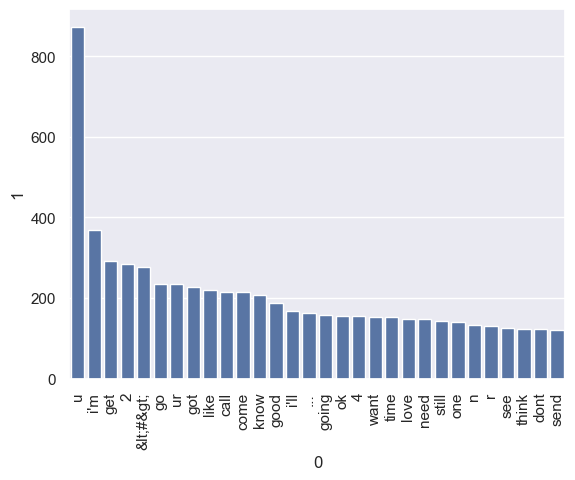

In [131]:
ham_common_words=pd.DataFrame(Counter(ham_corpus).most_common(30))

sns.barplot(x=ham_common_words[0],y=ham_common_words[1])
plt.xticks(rotation='vertical')
plt.show()

In [132]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'transformed_text' is your feature column
x = df['transformed_text']  # Define 'x' with your feature data
y = df['Target']           # Define 'y' with your target labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [133]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
x_train_vec = vectorizer.fit_transform(x_train)

# Transform the testing data using the same vocabulary
x_test_vec = vectorizer.transform(x_test)

# Now, fit the MultinomialNB model with the vectorized data
mnb = MultinomialNB()
mnb.fit(x_train_vec, y_train)

# Predict on the vectorized test data
y_pred = mnb.predict(x_test_vec)

print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))

accuracy: 0.968609865470852
precision: 1.0


In [135]:
import pickle
pickle.dump(mnb,open('spam.pkl','wb'))
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))